In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from catboost import CatBoostRegressor

In [4]:
train = pd.read_csv("Train.csv")
train.head()

,Land Size (acres),Produced_Quantity(liters/kg),Unit_Cost_Price,Storage_Duration(days),Unit_Selling_Price,Current_Inventory(liters/kg),Reorder_Point(liters/kg)
0,487.280165,689.773112,65.489122,14.789143,65.011749,929.000000,44.283555
1,233.133981,420.007154,83.754371,62.722265,14.016305,275.074672,28.443682
2,554.352044,787.949069,52.206387,18.115320,34.988276,125.769260,93.996371
3,769.477148,406.135877,99.960000,39.746177,19.136160,508.713089,56.365593
4,644.925639,856.429625,71.275426,2.764153,37.763397,239.997168,49.503824


In [6]:
train.shape

(9565, 7)

In [24]:
train.describe()

,Land Size (acres),Produced_Quantity(liters/kg),Unit_Cost_Price,Storage_Duration(days),Unit_Selling_Price,Current_Inventory(liters/kg),Reorder_Point(liters/kg)
count,9565.000000,9565.000000,9565.000000,9565.000000,9565.000000,9565.000000,9565.000000
mean,511.533576,504.199100,54.827818,39.853842,54.784888,297.462573,54.966862
std,261.882008,264.152515,23.663979,24.173424,24.692255,177.879045,21.143383
min,10.320000,1.240000,10.050000,1.017757,5.610000,0.029549,10.254052
25%,323.746488,315.668876,37.723371,21.275766,37.096384,159.099109,39.089137
50%,512.978253,504.046811,54.535606,37.114908,54.861214,279.841075,54.825014
75%,701.052464,696.144899,71.787034,55.461974,72.526056,416.594871,71.082242
max,998.990000,999.820000,99.960000,150.000000,103.490000,929.000000,99.937901


In [8]:
train.isnull().sum()

Land Size (acres)               0
Produced_Quantity(liters/kg)    0
Unit_Cost_Price                 0
Storage_Duration(days)          0
Unit_Selling_Price              0
Current_Inventory(liters/kg)    0
Reorder_Point(liters/kg)        0
dtype: int64

In [10]:
train.duplicated().sum()

0

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9565 entries, 0 to 9564
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Land Size (acres)             9565 non-null   float64
 1   Produced_Quantity(liters/kg)  9565 non-null   float64
 2   Unit_Cost_Price               9565 non-null   float64
 3   Storage_Duration(days)        9565 non-null   float64
 4   Unit_Selling_Price            9565 non-null   float64
 5   Current_Inventory(liters/kg)  9565 non-null   float64
 6   Reorder_Point(liters/kg)      9565 non-null   float64
dtypes: float64(7)
memory usage: 523.2 KB


In [14]:
test = pd.read_csv("Test.csv")
test.head()

,Land Size (acres),Produced_Quantity(liters/kg),Unit_Cost_Price,Storage_Duration(days),Unit_Selling_Price,Current_Inventory(liters/kg),Reorder_Point(liters/kg)
0,88.950096,604.936855,63.487730,6.696248,41.563186,620.109760,NaN
1,946.821974,329.792783,11.023929,34.583099,35.582403,549.433472,NaN
2,644.010389,652.801553,10.828743,15.933461,103.490000,636.396079,NaN
3,149.044945,456.167347,39.136687,34.484335,75.887302,278.244479,NaN
4,82.016371,999.820000,42.094462,74.986862,83.037249,252.496469,NaN


In [16]:
test.shape

(300, 7)

In [18]:
test.isnull().sum()

Land Size (acres)                 0
Produced_Quantity(liters/kg)      0
Unit_Cost_Price                   0
Storage_Duration(days)            0
Unit_Selling_Price                0
Current_Inventory(liters/kg)      0
Reorder_Point(liters/kg)        300
dtype: int64

In [20]:
test.duplicated().sum()

0

<Axes: ylabel='Reorder_Point(liters/kg)'>

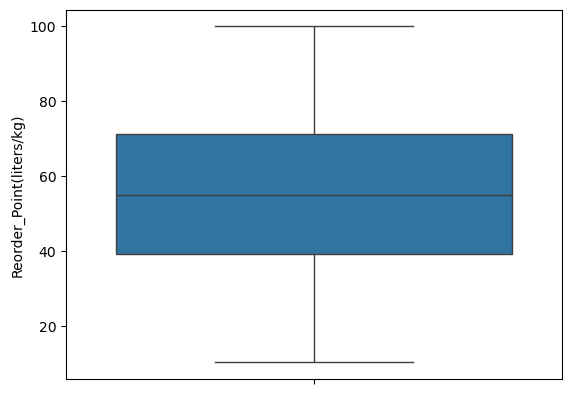

In [22]:
sns.boxplot(train['Reorder_Point(liters/kg)'])

In [26]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(9865, 7)

In [28]:
combined.columns

Index(['Land Size (acres)', 'Produced_Quantity(liters/kg)', 'Unit_Cost_Price',
       'Storage_Duration(days)', 'Unit_Selling_Price',
       'Current_Inventory(liters/kg)', 'Reorder_Point(liters/kg)'],
      dtype='object')

In [32]:
numerical_columns = combined[['Land Size (acres)',  'Produced_Quantity(liters/kg)', 'Unit_Cost_Price','Storage_Duration(days)', 'Unit_Selling_Price',
       'Current_Inventory(liters/kg)']]

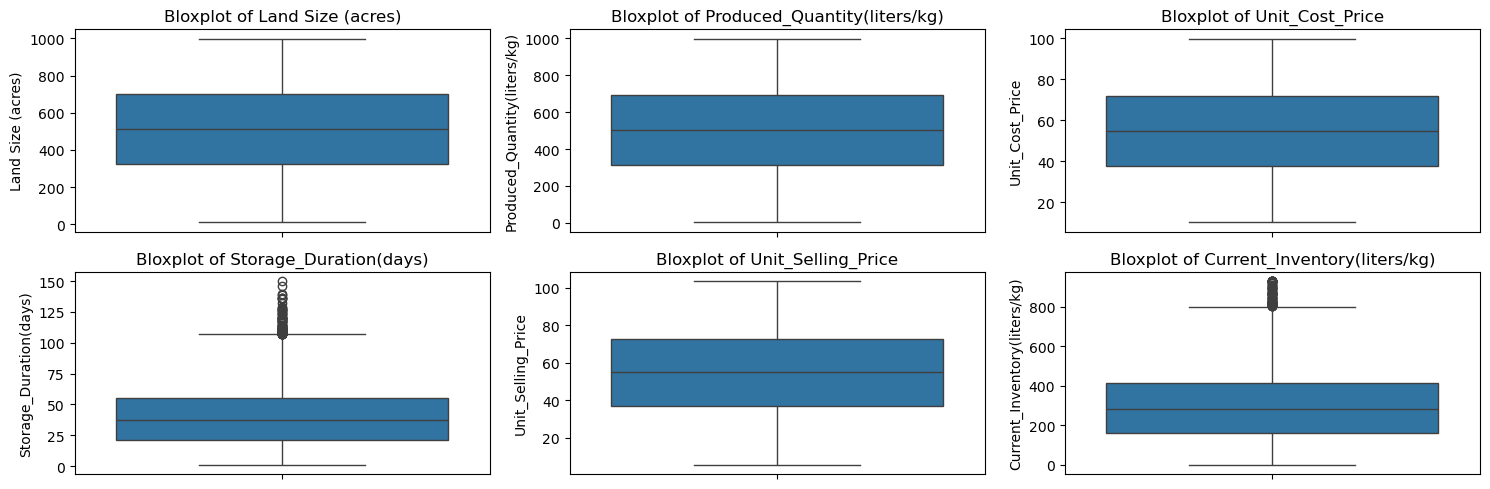

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(data = combined, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

In [36]:
def replace_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    median_value = df[column].median()
    df[column] = np.where((df[column]<lower)|(df[column]>upper), median_value, df[column])
    return df

In [38]:
for col in numerical_columns.columns:
    concat_df = replace_outliers(combined, col)

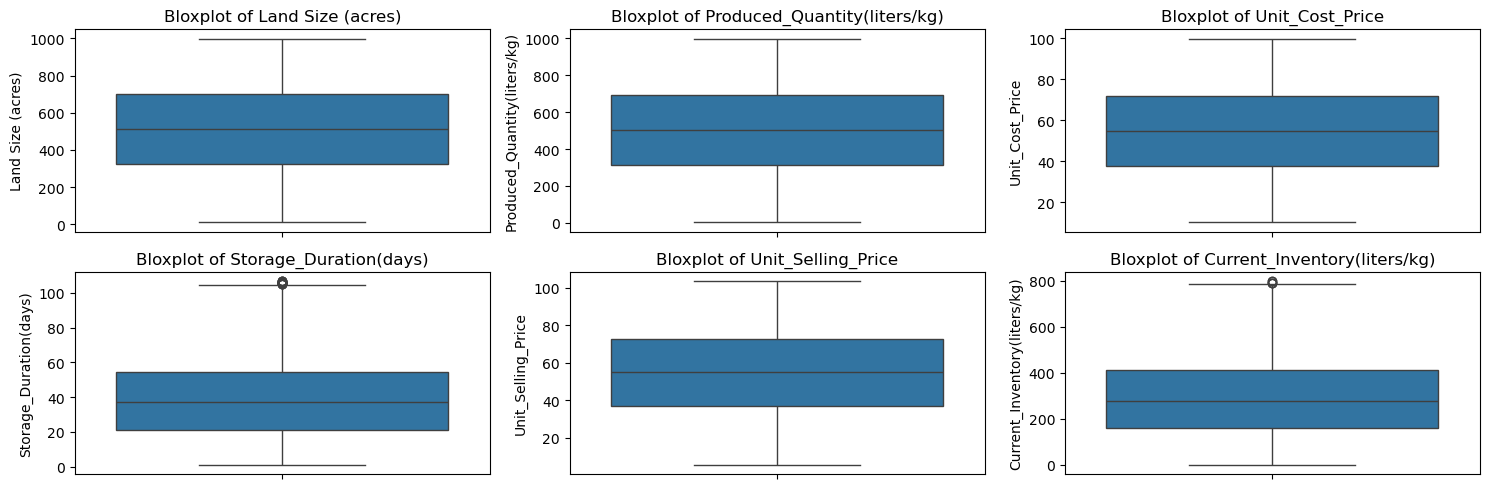

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(data = combined, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

In [42]:
combined['Production_Efficiency'] = combined['Produced_Quantity(liters/kg)'] / combined['Land Size (acres)']

In [44]:
combined['Profit_per_Unit'] = combined['Unit_Selling_Price'] - combined['Unit_Cost_Price']

In [46]:
combined['Total_Revenue'] = combined['Produced_Quantity(liters/kg)'] * combined['Unit_Selling_Price']

In [48]:
combined['Cost_Revenue_Ratio'] = combined['Unit_Cost_Price'] / (combined['Unit_Selling_Price'] + 1e-5)

In [50]:
combined['Inventory_Turnover'] = combined['Produced_Quantity(liters/kg)'] / (combined['Current_Inventory(liters/kg)'] + 1e-5)

In [52]:
combined['Storage_Efficiency'] = combined['Storage_Duration(days)'] / (combined['Produced_Quantity(liters/kg)'] + 1e-5)

In [56]:
X = combined.drop(columns=['Reorder_Point(liters/kg)'])
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print(vif_data.sort_values('VIF', ascending=False))

                         feature       VIF
2                Unit_Cost_Price       inf
4             Unit_Selling_Price       inf
7                Profit_per_Unit       inf
8                  Total_Revenue  9.745471
1   Produced_Quantity(liters/kg)  6.087188
9             Cost_Revenue_Ratio  1.852313
6          Production_Efficiency  1.272841
0              Land Size (acres)  1.239773
11            Storage_Efficiency  1.162019
3         Storage_Duration(days)  1.018800
5   Current_Inventory(liters/kg)  1.005200
10            Inventory_Turnover  1.005178


C:\Users\ahpat\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [58]:
correlation_matrix = combined.corr()
target_corr = correlation_matrix["Reorder_Point(liters/kg)"].sort_values(ascending=False)
print(target_corr)

Reorder_Point(liters/kg)        1.000000
Storage_Duration(days)          0.025523
Unit_Cost_Price                 0.015000
Current_Inventory(liters/kg)    0.013126
Unit_Selling_Price              0.010594
Total_Revenue                   0.008111
Storage_Efficiency              0.006359
Land Size (acres)               0.004565
Produced_Quantity(liters/kg)    0.000558
Cost_Revenue_Ratio             -0.001258
Profit_per_Unit                -0.002724
Inventory_Turnover             -0.008132
Production_Efficiency          -0.014034
Name: Reorder_Point(liters/kg), dtype: float64


In [60]:
combined = combined.drop(['Unit_Cost_Price', 'Unit_Selling_Price', 'Profit_per_Unit'], axis = 1)

In [62]:
newtrain = combined.iloc[0:9565, :]
newtest = combined.iloc[9565:, :]

In [64]:
newtrain.shape

(9565, 10)

In [66]:
newtest = newtest.drop('Reorder_Point(liters/kg)', axis = 1)
newtest.shape

(300, 9)

In [68]:
x = newtrain.drop('Reorder_Point(liters/kg)', axis = 1)
y = newtrain['Reorder_Point(liters/kg)']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [76]:
models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(),
         'XGB': XGBRegressor(), 'Ridge': Ridge(), 'Lasso': Lasso(), 'CatBoost': CatBoostRegressor()}

In [78]:
def evaluate_models(x_train, x_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(x_train, y_train).predict(x_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        results[name] = rmse
    return results

In [80]:
results = evaluate_models(x_train, x_test, y_train, y_test, models)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 7652, number of used features: 9
[LightGBM] [Info] Start training from score 55.014832
Learning rate set to 0.05647
0:	learn: 21.1020153	total: 148ms	remaining: 2m 28s
1:	learn: 21.0943958	total: 151ms	remaining: 1m 15s
2:	learn: 21.0885678	total: 157ms	remaining: 52.1s
3:	learn: 21.0822821	total: 162ms	remaining: 40.2s
4:	learn: 21.0733554	total: 165ms	remaining: 32.8s
5:	learn: 21.0647745	total: 167ms	remaining: 27.7s
6:	learn: 21.0583225	total: 171ms	remaining: 24.2s
7:	learn: 21.0533366	total: 173ms	remaining: 21.5s
8:	learn: 21.0457194	total: 177ms	remaining: 19.5s
9:	learn: 21.0402350	tota

In [81]:
best_model_name = min(results, key = results.get)
best_model = models[best_model_name]

In [82]:
print(f"best model is {best_model_name} with rmse {results[best_model_name]}")

best model is Lasso with rmse 21.252937785039155


In [86]:
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [88]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

21.252937785039155


In [93]:
x_train = newtrain.drop('Reorder_Point(liters/kg)', axis = 1)
y_train = newtrain['Reorder_Point(liters/kg)']
x_test = newtest
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [95]:
solution = pd.DataFrame({'Reorder_Point(liters/kg)': y_pred})
solution.head()

,Reorder_Point(liters/kg)
0,54.592000
1,55.186182
2,55.612881
3,54.986445
4,56.090322


In [97]:
solution.to_csv('Solution.csv', index = False)